In [66]:
from cognitive.format.hypergraph.channels.tensor_channel import CognitiveArbiter, TensorCognitiveIcon, \
    CognitiveChannel, HypergraphTensorTransformation
from cognitive.format.hypergraph.lang.mapping.cogni_lang_mapping import load_from_description
from cognitive.format.hypergraph.lang.mapping.graphviz_mapping import create_graph_view
from cognitive.format.hypergraph.laplacian.graph_metrics import laplacian_calc
from cognitive.format.hypergraph.laplacian.graph_tensor_operations import graph_upper_bound_entropy_vector
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [67]:
sys0, channel = load_from_description("../examples/example_robotcar.cogni")
create_graph_view(sys0)
arbiter = CognitiveArbiter(name="arbiter", timestamp=0)
channel = CognitiveChannel("channel_01", 0, arbiter)
view_icon = TensorCognitiveIcon("out", 0)
ch = HypergraphTensorTransformation("dendrite1", 0, arbiter.domain, channel, view_icon)
channel.add_connection(ch, 0, view_icon)
tensor = ch.encode([sys0])

-> 1edbc64ba113bf78ac9033465d317dfa48fe75449c447ae74ad600a5: simplebot
	-> c65355ad201188b1a09f96702dd182824df44e4e4ea9be202f4eff57: basic_structure
		-> a55a9b0f24e8225d4bc97eeab3aee0d4a274f2fb98d510aa8fb86138: world
		-> 906b1cf52808f83a7b693f49704859e1acf25f5e938f594e93f6f3cb: wheel
			-> 3d7bc3b39ce366d222cef758d88145312d3ba2d1f759a2a1ae9f28cb: world
			-> d97f958f42fbdded219f6ad9d5a46dd58a15f8af303f070f618120ae: wheel_base
				-> 53a1623b05b086d30a0eb4e28403d74fc08143d587308f2bd78c53e5: wheel_base_viz
					-> 459b8962d3cc6d789f9a8928c14ae29e8ebd14f9ee6968fa8ea48f91: geom_wheel_base_viz
				-> db24b71424896d9077a5dc9160f07162b361c713be444d6c329d1ad5: coll_wheel_base
ref_wheel_base/wheel_base_viz: <-wheel_base_viz, ->coll_wheel_base, 
			-> d7551ec89244b66a38fc92740ffc472ea42f18c667cdc57ab216db88: tire
				-> 6625041057bc0e3a593576f767b81e302e8683aff09d6e5e5ba9df7a: wheel_viz
					-> 8b7f0864af61af0d671dfda866fe73bcd78a509b193e3450fb986259: geom_wheel_viz
				-> c6301579d541f4dfdc5c

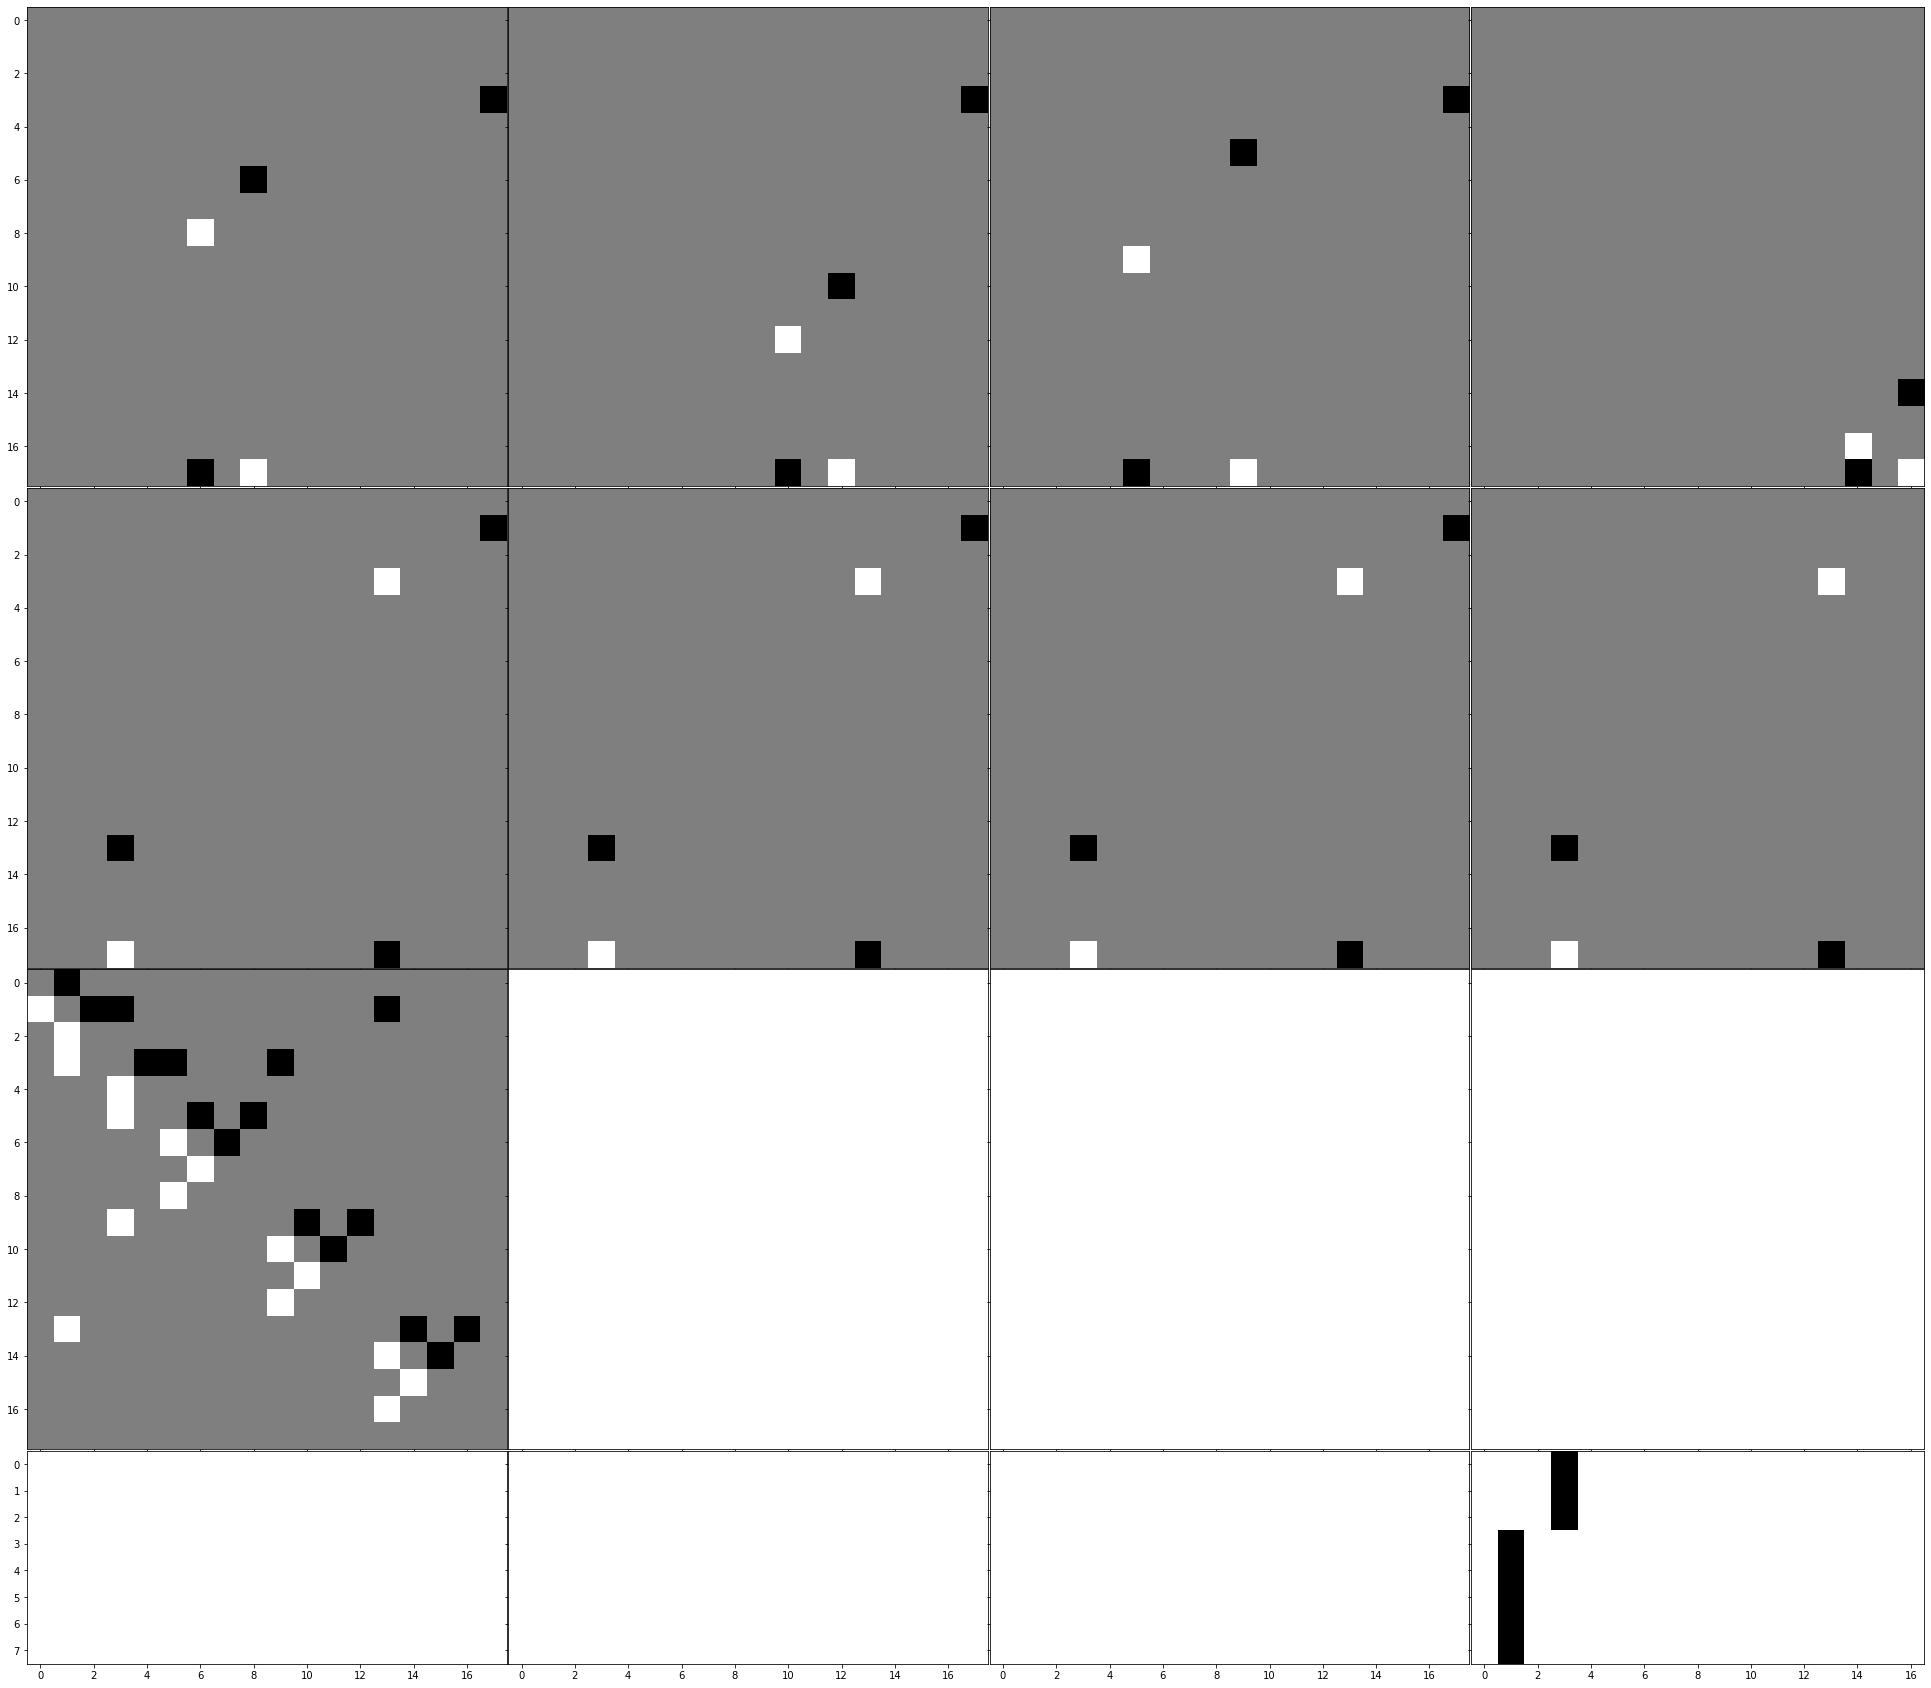

In [68]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4))
for ax, im in zip(grid, tensor):
    ax.imshow(im, cmap=cm.binary)
grid[-1].imshow(tensor[:-1,:-1,-1], cmap=cm.binary)

In [4]:
for v in sys0.subset_elements:
    print(i)
    for i in v.subset_elements:
        print(i)

NameError: name 'i' is not defined

In [69]:
np.sum(np.abs(tensor[-1,:,:]), axis=1)

array([1., 4., 1., 4., 1., 3., 2., 1., 1., 3., 2., 1., 1., 3., 2., 1., 1.,
       0.])

In [70]:
D_m, L_m, d, total_deg = laplacian_calc(tensor)

In [71]:
entropy, entropy_vector = graph_upper_bound_entropy_vector(tensor)

In [72]:
entropy

9.573557262275184

In [73]:
D_m.shape

(8, 17)

In [74]:
tensor[:-1, -1,:]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.]])

In [75]:
edge_distribution = np.sum(np.abs(tensor)[:-1, -1, :-1], axis=0)/np.sum(np.abs(tensor)[:-1, -1, :-1])

In [76]:
edge_distribution

array([0.    , 0.    , 0.    , 0.25  , 0.    , 0.0625, 0.0625, 0.    ,
       0.0625, 0.0625, 0.0625, 0.    , 0.0625, 0.25  , 0.0625, 0.    ,
       0.0625])

In [77]:
node_distribution = np.sum(np.abs(D_m), axis=0)/np.sum(np.abs(D_m))/np.sum(np.abs(tensor[-1,:,:]))

In [78]:
node_distribution

array([0.        , 0.        , 0.        , 0.0078125 , 0.        ,
       0.00195312, 0.00195312, 0.        , 0.00195312, 0.00195312,
       0.00195312, 0.        , 0.00195312, 0.0078125 , 0.00195312,
       0.        , 0.00195312])

In [79]:
D_m.shape

(8, 17)

In [80]:
(np.abs(tensor)[:-1, -1, :-1]).shape

(8, 17)

In [81]:
edge_parent_distribution = np.sum(tensor[:-1,:-1,-1], axis=0)/np.sum(tensor[:-1,:-1,-1])
edge_parent_distribution

array([0.   , 0.625, 0.   , 0.375, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [82]:
sb = np.outer(node_distribution, edge_parent_distribution+edge_distribution)
sb = sb/np.sum(sb)
sb

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.078125  , 0.        , 0.078125  , 0.        ,
        0.0078125 , 0.0078125 , 0.        , 0.0078125 , 0.0078125 ,
        0.0078125 , 0.        , 0.0078125 , 0.03125   , 0.0078125 ,
        0.        , 0.0078125 ],
       [0.        , 0.        , 0.        , 0.      

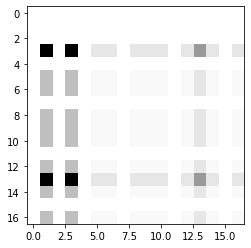

In [83]:
plt.imshow(sb, cmap=cm.binary)

In [84]:
np.linalg.eig(sb)[0]

array([1.25000000e-01+0.00000000e+00j, 2.16840434e-19+2.69919494e-18j,
       2.16840434e-19-2.69919494e-18j, 1.13629867e-33+0.00000000e+00j,
       6.84227766e-49+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j])

In [85]:
_e = (edge_parent_distribution+edge_distribution)
cross_entropy = -np.sum(node_distribution*np.nan_to_num(np.log2(node_distribution/_e), neginf=0, posinf=0))
print(np.log(cross_entropy), cross_entropy)

-1.7922942327407327 0.1665775632413075


C:\Users\keret\AppData\Local\Temp\ipykernel_28948\4097367438.py:2: RuntimeWarning: invalid value encountered in divide
  cross_entropy = -np.sum(node_distribution*np.nan_to_num(np.log2(node_distribution/_e), neginf=0, posinf=0))
C:\Users\keret\AppData\Local\Temp\ipykernel_28948\4097367438.py:2: RuntimeWarning: divide by zero encountered in log2
  cross_entropy = -np.sum(node_distribution*np.nan_to_num(np.log2(node_distribution/_e), neginf=0, posinf=0))


In [86]:
cross_entropy = np.sum(node_distribution*np.nan_to_num(np.log2(_e/node_distribution), neginf=0, posinf=0))
print(np.log(cross_entropy), cross_entropy)

-1.7922942327407327 0.1665775632413075


C:\Users\keret\AppData\Local\Temp\ipykernel_28948\2737728580.py:1: RuntimeWarning: divide by zero encountered in divide
  cross_entropy = np.sum(node_distribution*np.nan_to_num(np.log2(_e/node_distribution), neginf=0, posinf=0))
C:\Users\keret\AppData\Local\Temp\ipykernel_28948\2737728580.py:1: RuntimeWarning: invalid value encountered in divide
  cross_entropy = np.sum(node_distribution*np.nan_to_num(np.log2(_e/node_distribution), neginf=0, posinf=0))


In [88]:
entropy/cross_entropy

57.472069323086096